# Experimental Project Code
Statistical Methods for Machine Learning: Neural Networks


Chiara Anni,
Nicolò Pignatelli

In [ ]:
import os
os.environ['PYTHONHASHSEED']=str(1)

In [ ]:
# Libraries
!pip install keras-tuner --upgrade
import cv2
import random
import zipfile
import itertools
import numpy as np
import pandas as pd
import seaborn as sn
import tensorflow as tf
import keras_tuner as kt
from tensorflow import keras
from matplotlib import pyplot
import matplotlib.pyplot as plt
from keras.regularizers import l2
from keras.models import Sequential
from sklearn.metrics import zero_one_loss
from sklearn.metrics import confusion_matrix
from keras.callbacks import TensorBoard, EarlyStopping
from sklearn.model_selection import KFold, cross_val_score
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
zip_train=zipfile.ZipFile('/content/drive/MyDrive/Colab Notebooks/archive.zip', 'r')
zip_train.extractall('/tmp')
zip_train.close()

In [ ]:
device_name = tf.test.gpu_device_name()
if len(device_name) > 0:
    print("Found GPU at: {}".format(device_name))
else:
    device_name = "/device:CPU:0"
    print("No GPU, using {}.".format(device_name))

In [ ]:
def reset_random_seeds():
   os.environ['PYTHONHASHSEED']=str(1)
   tf.random.set_seed(1)
   np.random.seed(1)
   random.seed(1)

In [ ]:
# Loading of the images (training set)
reset_random_seeds()

TRAINING_SET = []
DATADIR = "/tmp/train"
#DATADIR = "C:/Users/Lenovo/Desktop/PROGETTO/train"
CATEGORIES = ["chihuahua", "muffin"]
IMG_SIZE = 150


def training_set_loading():

    for category in CATEGORIES:
        path = os.path.join(DATADIR,category)  # create path to chihuahuas and muffins
        class_number = CATEGORIES.index(category) # 0=chihuahua, 1=muffin

        for img in os.listdir(path):  # iterate over each image per chihuahuas and muffins
            img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE) # convert to array
            new_array= cv2.resize(img_array,(IMG_SIZE, IMG_SIZE)) #all images now have the same shape
            TRAINING_SET.append([new_array,class_number])


training_set_loading()
random.shuffle(TRAINING_SET)
# Now we divide between features and labels
X = [] # features
y = [] # labels


for feats,labs in TRAINING_SET:
    X.append(feats)
    y.append(labs)

X = np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE)
X = X/255
y = np.array(y)

# Loading of the images (test set)

TEST_SET = []
#DATADIR_I = "C:/Users/Lenovo/Desktop/PROGETTO/test"
DATADIR_I = "/tmp/test"

def test_set_loading():

    for category in CATEGORIES:
        path = os.path.join(DATADIR_I,category)  # create path to chihuahuas and muffins
        class_number = CATEGORIES.index(category) # 0=chihuahua, 1=muffin

        for img in os.listdir(path):  # iterate over each image per chihuahuas and muffins
            img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE) # convert to array
            new_array= cv2.resize(img_array,(IMG_SIZE, IMG_SIZE)) #all images now have the same shape
            TEST_SET.append([new_array,class_number])


test_set_loading()

X_test = []
y_test = []


for feats,labs in TEST_SET:
    X_test.append(feats)
    y_test.append(labs)


X_test = np.array(X_test).reshape(-1,IMG_SIZE,IMG_SIZE)
X_test = X_test/255
y_test = np.array(y_test)

input_shape=(IMG_SIZE,IMG_SIZE,1)
X_conv = X.reshape(len(X),IMG_SIZE,IMG_SIZE,1)
X_test_conv = X_test.reshape(len(X_test),IMG_SIZE,IMG_SIZE,1)


In [ ]:
#plot function

def plot_function(history):
  #graph
  # summarize history for accuracy
  plt.plot(history.history['accuracy'], color='blue')
  plt.plot(history.history['val_accuracy'], color='violet')
  plt.title('model accuracy')
  plt.grid()
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()
  # summarize history for loss
  plt.plot(history.history['loss'], color='blue')
  plt.plot(history.history['val_loss'],color='violet')
  plt.title('model loss')
  plt.grid()
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()

# **MULTILAYER NEURAL NETWORK**

In [ ]:
#Base multilayer model

reset_random_seeds()

model_base=Sequential()

model_base.add(Flatten(input_shape=(IMG_SIZE,IMG_SIZE)))
model_base.add(Dense(512, activation='relu'))
model_base.add(Dense(256, activation='relu'))
model_base.add(Dense(1,activation='sigmoid'))


model_base.compile(optimizer=keras.optimizers.Adam(),
            loss='binary_crossentropy',
            metrics=['accuracy'])

history=model_base.fit(X, y, batch_size=32, epochs=20, validation_split=0.2)
plot_function(history)

Epoch 1/20
119/119 [==============================] - 6s 8ms/step - loss: 1.0578 - accuracy: 0.5478 - val_loss: 0.6696 - val_accuracy: 0.5628
Epoch 2/20
119/119 [==============================] - 1s 6ms/step - loss: 0.7285 - accuracy: 0.5486 - val_loss: 0.7697 - val_accuracy: 0.5576
Epoch 3/20
119/119 [==============================] - 1s 7ms/step - loss: 0.6765 - accuracy: 0.5792 - val_loss: 0.6500 - val_accuracy: 0.6019
Epoch 4/20
119/119 [==============================] - 1s 7ms/step - loss: 0.6352 - accuracy: 0.6352 - val_loss: 0.6423 - val_accuracy: 0.6230
Epoch 5/20
119/119 [==============================] - 1s 7ms/step - loss: 0.6278 - accuracy: 0.6397 - val_loss: 0.6619 - val_accuracy: 0.5966
Epoch 6/20
119/119 [==============================] - 1s 7ms/step - loss: 0.6261 - accuracy: 0.6366 - val_loss: 0.6199 - val_accuracy: 0.6610
Epoch 7/20
119/119 [==============================] - 1s 7ms/step - loss: 0.6220 - accuracy: 0.6445 - val_loss: 0.6048 - val_accuracy: 0.6653
Epoch 

In [ ]:
# Optimization of the learning rate

learn_rates=[1e-2,1e-3,1e-4,1e-5,1e-6]

for learn_rate in learn_rates:
    NAME = "{}-learn_rate--{}-batch_size".format(learn_rate, 32)
    print(NAME)
    reset_random_seeds()

    model_base=Sequential()

    model_base.add(Flatten(input_shape=(IMG_SIZE,IMG_SIZE)))
    model_base.add(Dense(512, activation='relu'))
    model_base.add(Dense(256, activation='relu'))
    model_base.add(Dense(1,activation='sigmoid'))

    tensorboard = TensorBoard(log_dir="logs_learn_rate/{}".format(NAME))

    model_base.compile(optimizer=keras.optimizers.Adam(learn_rate), loss='binary_crossentropy', metrics=['accuracy'])

    model_base.fit(X, y, batch_size=32, epochs=20, validation_split=0.2,callbacks=[tensorboard])

0.01-learn_rate--32-batch_size
Epoch 1/20
119/119 [==============================] - 2s 7ms/step - loss: 10.2474 - accuracy: 0.5232 - val_loss: 0.6834 - val_accuracy: 0.5396
Epoch 2/20
119/119 [==============================] - 1s 5ms/step - loss: 0.6932 - accuracy: 0.5457 - val_loss: 0.6972 - val_accuracy: 0.4720
Epoch 3/20
119/119 [==============================] - 1s 6ms/step - loss: 0.6854 - accuracy: 0.5169 - val_loss: 0.6873 - val_accuracy: 0.4583
Epoch 4/20
119/119 [==============================] - 1s 6ms/step - loss: 0.6900 - accuracy: 0.5322 - val_loss: 0.6833 - val_accuracy: 0.5586
Epoch 5/20
119/119 [==============================] - 1s 7ms/step - loss: 0.6858 - accuracy: 0.5372 - val_loss: 0.6870 - val_accuracy: 0.5554
Epoch 6/20
119/119 [==============================] - 1s 6ms/step - loss: 0.6766 - accuracy: 0.5375 - val_loss: 0.6732 - val_accuracy: 0.5576
Epoch 7/20
119/119 [==============================] - 1s 7ms/step - loss: 0.6744 - accuracy: 0.5401 - val_loss: 0.68

In [ ]:
# Optimization of the batch size

learn_rates=[1e-5]
batch_sizes=[32,64,128,256,512]

for batch in batch_sizes:
    for learn_rate in learn_rates:
        NAME = "{}-learn_rate--{}-batch_size".format(learn_rate, batch)
        print(NAME)
        reset_random_seeds()

        model_base=Sequential()

        model_base.add(Flatten(input_shape=(IMG_SIZE,IMG_SIZE)))
        model_base.add(Dense(512, activation='relu'))
        model_base.add(Dense(256, activation='relu'))
        model_base.add(Dense(1,activation='sigmoid'))

        tensorboard = TensorBoard(log_dir="logs_learn_batch_2_T2/{}".format(NAME))

        model_base.compile(optimizer=keras.optimizers.Adam(learn_rate), loss='binary_crossentropy', metrics=['accuracy'])

        model_base.fit(X, y, batch_size=batch, epochs=20, validation_split=0.2,callbacks=[tensorboard])

1e-05-learn_rate--32-batch_size
Epoch 1/20
119/119 [==============================] - 7s 8ms/step - loss: 0.6754 - accuracy: 0.5761 - val_loss: 0.6433 - val_accuracy: 0.6325
Epoch 2/20
119/119 [==============================] - 1s 5ms/step - loss: 0.6424 - accuracy: 0.6241 - val_loss: 0.6317 - val_accuracy: 0.6494
Epoch 3/20
119/119 [==============================] - 1s 5ms/step - loss: 0.6204 - accuracy: 0.6492 - val_loss: 0.6252 - val_accuracy: 0.6283
Epoch 4/20
119/119 [==============================] - 1s 7ms/step - loss: 0.6022 - accuracy: 0.6680 - val_loss: 0.6112 - val_accuracy: 0.6389
Epoch 5/20
119/119 [==============================] - 1s 7ms/step - loss: 0.5861 - accuracy: 0.6926 - val_loss: 0.6091 - val_accuracy: 0.6505
Epoch 6/20
119/119 [==============================] - 1s 7ms/step - loss: 0.5754 - accuracy: 0.7018 - val_loss: 0.6184 - val_accuracy: 0.6642
Epoch 7/20
119/119 [==============================] - 1s 7ms/step - loss: 0.5670 - accuracy: 0.7047 - val_loss: 0.61

In [ ]:
#Start with 3 layers and all the sizes

with tf.device(device_name):
  dense_layers=3
  layer_sizes=[64,128,256,512,1024]
  permutations=list(itertools.permutations(layer_sizes, dense_layers))

  for perm in permutations:

        NAME = "{}-{}-{}-nodes-{}-dense--{}-learn_rate".format(perm[0], perm[1], perm[2], dense_layers, 1e-5)
        print(NAME)

        reset_random_seeds()
        model = Sequential()
        model.add(Flatten(input_shape=(IMG_SIZE,IMG_SIZE)))

        for i in range(dense_layers):
             model.add(Dense(perm[i], activation='relu'))


        model.add(Dense(1,activation='sigmoid'))

        tensorboard = TensorBoard(log_dir="logs_3dense/{}".format(NAME))

        model.compile(loss='binary_crossentropy',optimizer=keras.optimizers.Adam(1e-5),metrics=['accuracy'])
        model.fit(X, y,batch_size=32,epochs=20,validation_split=0.3,callbacks=[tensorboard])

64-128-256-nodes-3-dense--1e-05-learn_rate
Epoch 1/20
104/104 [==============================] - 3s 9ms/step - loss: 0.6761 - accuracy: 0.5581 - val_loss: 0.6711 - val_accuracy: 0.5711
Epoch 2/20
104/104 [==============================] - 1s 6ms/step - loss: 0.6636 - accuracy: 0.5877 - val_loss: 0.6615 - val_accuracy: 0.6275
Epoch 3/20
104/104 [==============================] - 1s 5ms/step - loss: 0.6549 - accuracy: 0.6049 - val_loss: 0.6543 - val_accuracy: 0.6204
Epoch 4/20
104/104 [==============================] - 1s 6ms/step - loss: 0.6455 - accuracy: 0.6230 - val_loss: 0.6472 - val_accuracy: 0.6324
Epoch 5/20
104/104 [==============================] - 1s 6ms/step - loss: 0.6386 - accuracy: 0.6420 - val_loss: 0.6395 - val_accuracy: 0.6465
Epoch 6/20
104/104 [==============================] - 1s 5ms/step - loss: 0.6307 - accuracy: 0.6411 - val_loss: 0.6340 - val_accuracy: 0.6408
Epoch 7/20
104/104 [==============================] - 1s 6ms/step - loss: 0.6241 - accuracy: 0.6634 - val

In [ ]:
# Start with 4 layers and all the sizes

with tf.device(device_name):
  dense_layers=4
  layer_sizes=[64,128,256,512,1024]
  permutations=list(itertools.permutations(layer_sizes, dense_layers))

  for perm in permutations:

        NAME = "{}-{}-{}-{}-nodes-{}-dense--{}-learn_rate".format(perm[0], perm[1], perm[2],perm[3], dense_layers, 1e-5)
        print(NAME)

        reset_random_seeds()
        model = Sequential()
        model.add(Flatten(input_shape=(IMG_SIZE,IMG_SIZE)))

        for i in range(dense_layers):
             model.add(Dense(perm[i], activation='relu'))


        model.add(Dense(1,activation='sigmoid'))

        tensorboard = TensorBoard(log_dir="logs_4dense/{}".format(NAME))

        model.compile(loss='binary_crossentropy',optimizer=keras.optimizers.Adam(1e-5),metrics=['accuracy'])
        model.fit(X, y,batch_size=32,epochs=20,validation_split=0.3,callbacks=[tensorboard])


Output streaming troncato alle ultime 5000 righe.
37/37 [==============================] - 0s 3ms/step - loss: 0.5886 - accuracy: 0.6875
64-128-256-1024-nodes-4-dense--1e-05-learn_rate
Epoch 1/20
104/104 [==============================] - 3s 9ms/step - loss: 0.6809 - accuracy: 0.5466 - val_loss: 0.6807 - val_accuracy: 0.5268
Epoch 2/20
104/104 [==============================] - 1s 6ms/step - loss: 0.6709 - accuracy: 0.5635 - val_loss: 0.6762 - val_accuracy: 0.5465
Epoch 3/20
104/104 [==============================] - 1s 6ms/step - loss: 0.6618 - accuracy: 0.5986 - val_loss: 0.6663 - val_accuracy: 0.5782
Epoch 4/20
104/104 [==============================] - 1s 6ms/step - loss: 0.6532 - accuracy: 0.6139 - val_loss: 0.6581 - val_accuracy: 0.5972
Epoch 5/20
104/104 [==============================] - 1s 13ms/step - loss: 0.6442 - accuracy: 0.6218 - val_loss: 0.6538 - val_accuracy: 0.6000
Epoch 6/20
104/104 [==============================] - 1s 9ms/step - loss: 0.6391 - accuracy: 0.6318 - va

In [ ]:
# Start with 5 layers and all the sizes

with tf.device(device_name):
  dense_layers=5
  layer_sizes=[64,128,256,512,1024]
  permutations=list(itertools.permutations(layer_sizes, dense_layers))

  for perm in permutations:

        NAME = "{}-{}-{}-{}-{}-nodes-{}-dense--{}-learn_rate".format(perm[0], perm[1], perm[2],perm[3],perm[4], dense_layers, 1e-5)
        print(NAME)

        reset_random_seeds()
        model = Sequential()
        model.add(Flatten(input_shape=(IMG_SIZE,IMG_SIZE)))

        for i in range(dense_layers):
             model.add(Dense(perm[i], activation='relu'))


        model.add(Dense(1,activation='sigmoid'))

        tensorboard = TensorBoard(log_dir="logs_5dense/{}".format(NAME))

        model.compile(loss='binary_crossentropy',optimizer=keras.optimizers.Adam(1e-5),metrics=['accuracy'])
        model.fit(X, y, batch_size=32, epochs=20, validation_split=0.2, callbacks=[tensorboard])

Output streaming troncato alle ultime 5000 righe.
37/37 [==============================] - 0s 3ms/step - loss: 0.5993 - accuracy: 0.6715
64-128-256-1024-512-nodes-5-dense--1e-05-learn_rate
Epoch 1/20
119/119 [==============================] - 3s 8ms/step - loss: 0.6789 - accuracy: 0.5584 - val_loss: 0.6830 - val_accuracy: 0.5216
Epoch 2/20
119/119 [==============================] - 1s 6ms/step - loss: 0.6633 - accuracy: 0.5967 - val_loss: 0.6665 - val_accuracy: 0.5861
Epoch 3/20
119/119 [==============================] - 1s 6ms/step - loss: 0.6509 - accuracy: 0.6165 - val_loss: 0.6547 - val_accuracy: 0.6304
Epoch 4/20
119/119 [==============================] - 1s 6ms/step - loss: 0.6365 - accuracy: 0.6329 - val_loss: 0.6549 - val_accuracy: 0.5966
Epoch 5/20
119/119 [==============================] - 1s 8ms/step - loss: 0.6221 - accuracy: 0.6527 - val_loss: 0.6303 - val_accuracy: 0.6463
Epoch 6/20
119/119 [==============================] - 1s 8ms/step - loss: 0.6102 - accuracy: 0.6630 -

In [ ]:
# Showing the overfitting for the best 5 dense model
  NAME = "{}-{}-{}-{}-{}-nodes-{}-dense--{}-learn_rate_bestmodel".format(512, 1024, 256, 64, 128, 5, 1e-5)
  print(NAME)

  reset_random_seeds()
  model_5bestdense=Sequential()

  model_5bestdense.add(Flatten(input_shape=(IMG_SIZE,IMG_SIZE)))
  model_5bestdense.add(Dense(512, activation='relu'))
  model_5bestdense.add(Dense(1024, activation='relu'))
  model_5bestdense.add(Dense(256, activation='relu'))
  model_5bestdense.add(Dense(64, activation='relu'))
  model_5bestdense.add(Dense(128, activation='relu'))
  model_5bestdense.add(Dense(1,activation='sigmoid'))

  tensorboard = TensorBoard(log_dir="logs_bestdense_50epoch/{}".format(NAME))

  model_5bestdense.compile(loss='binary_crossentropy',optimizer=keras.optimizers.Adam(1e-5),metrics=['accuracy'])
  model_5bestdense.fit(X, y, batch_size=32, epochs=50, validation_split=0.2, callbacks=[tensorboard])

512-1024-256-64-128-nodes-5-dense--1e-05-learn_rate_bestmodel
Epoch 1/50
119/119 [==============================] - 8s 10ms/step - loss: 0.6654 - accuracy: 0.5877 - val_loss: 0.6658 - val_accuracy: 0.5597
Epoch 2/50
119/119 [==============================] - 1s 7ms/step - loss: 0.6412 - accuracy: 0.6255 - val_loss: 0.6441 - val_accuracy: 0.6156
Epoch 3/50
119/119 [==============================] - 1s 7ms/step - loss: 0.6277 - accuracy: 0.6408 - val_loss: 0.6279 - val_accuracy: 0.6463
Epoch 4/50
119/119 [==============================] - 1s 8ms/step - loss: 0.6067 - accuracy: 0.6735 - val_loss: 0.6179 - val_accuracy: 0.6505
Epoch 5/50
119/119 [==============================] - 1s 8ms/step - loss: 0.5933 - accuracy: 0.6859 - val_loss: 0.6001 - val_accuracy: 0.6779
Epoch 6/50
119/119 [==============================] - 1s 7ms/step - loss: 0.5722 - accuracy: 0.6999 - val_loss: 0.6320 - val_accuracy: 0.6283
Epoch 7/50
119/119 [==============================] - 1s 6ms/step - loss: 0.5624 - ac

In [ ]:
# Optimization of the dropout

with tf.device(device_name):

  for n in range(4):
    reset_random_seeds()

    model_5bestdense=Sequential()
    model_5bestdense.add(Flatten(input_shape=(IMG_SIZE,IMG_SIZE)))
    model_5bestdense.add(Dense(512, activation='relu'))
    if n==0:
      model_5bestdense.add(Dropout(0.5))
      NAME = "bestmodel--{}-drop({})".format(1,0.5)
      print(NAME)
    elif n==1:
      model_5bestdense.add(Dropout(0.2))
      NAME = "bestmodel--{}-drop({})".format(1,0.2)
      print(NAME)
    elif n==2:
      model_5bestdense.add(Dropout(0.2))
      NAME = "bestmodel--{}-drop({})".format(2,0.2)
      print(NAME)
    elif n==3:
      model_5bestdense.add(Dropout(0.1))
      NAME = "bestmodel--{}-drop({})".format(2,0.1)
      print(NAME)

    model_5bestdense.add(Dense(1024, activation='relu'))

    if n==2:
      model_5bestdense.add(Dropout(0.2))
    elif n==3:
      model_5bestdense.add(Dropout(0.1))

    model_5bestdense.add(Dense(256, activation='relu'))
    model_5bestdense.add(Dense(64, activation='relu'))
    model_5bestdense.add(Dense(128, activation='relu'))
    model_5bestdense.add(Dense(1,activation='sigmoid'))


    tensorboard = TensorBoard(log_dir="logs_bestdense_drops_01_02_05/{}".format(NAME))

    model_5bestdense.compile(loss='binary_crossentropy',optimizer=keras.optimizers.Adam(1e-5),metrics=['accuracy'])
    model_5bestdense.fit(X, y, batch_size=32, epochs=50, validation_split=0.2, callbacks=[tensorboard])

bestmodel--1-drop(0.5)
Epoch 1/50
119/119 [==============================] - 9s 9ms/step - loss: 0.6863 - accuracy: 0.5349 - val_loss: 0.6935 - val_accuracy: 0.5079
Epoch 2/50
119/119 [==============================] - 1s 8ms/step - loss: 0.6769 - accuracy: 0.5658 - val_loss: 0.7029 - val_accuracy: 0.5090
Epoch 3/50
119/119 [==============================] - 1s 7ms/step - loss: 0.6741 - accuracy: 0.5734 - val_loss: 0.6811 - val_accuracy: 0.5375
Epoch 4/50
119/119 [==============================] - 1s 8ms/step - loss: 0.6709 - accuracy: 0.5800 - val_loss: 0.6842 - val_accuracy: 0.5502
Epoch 5/50
119/119 [==============================] - 1s 8ms/step - loss: 0.6622 - accuracy: 0.5954 - val_loss: 0.6579 - val_accuracy: 0.5998
Epoch 6/50
119/119 [==============================] - 1s 6ms/step - loss: 0.6623 - accuracy: 0.5972 - val_loss: 0.6642 - val_accuracy: 0.5913
Epoch 7/50
119/119 [==============================] - 1s 6ms/step - loss: 0.6602 - accuracy: 0.5985 - val_loss: 0.6803 - val_

# **CONVOLUTIONAL NEURAL NETWORK**

In [ ]:
# Base convolutional model

NAME = "{}-{}-{}-conv--{}-kern--{}-pool".format(64,32,64,3,2)
reset_random_seeds()

model_base_conv=Sequential()

model_base_conv.add(Conv2D(64, (3,3), input_shape=input_shape, activation='relu'))
model_base_conv.add(MaxPooling2D(pool_size=(2,2)))

model_base_conv.add(Conv2D(32, (3,3), activation='relu'))

model_base_conv.add(Flatten())
model_base_conv.add(Dropout(0.5))

model_base_conv.add(Dense(64, activation='relu'))

model_base_conv.add(Dense(1,activation='sigmoid'))
tensorboard = TensorBoard(log_dir="logs_basemodel_conv/{}".format(NAME))

model_base_conv.compile(optimizer=keras.optimizers.Adam(),
            loss='binary_crossentropy',
            metrics=['accuracy'])

history=model_base_conv.fit(X_conv, y, batch_size=32, epochs=20, validation_split=0.2,callbacks=[tensorboard])
plot_function(history)

In [ ]:
# Optimization of the learning rate and batch size

learn_rates=[0.001,0.0001,0.00001]
batch_sizes=[32,64]

for batch in batch_sizes:
    for learn_rate in learn_rates:
      NAME = "{}-{}-{}-conv--{}-kern--{}-pool--{}-learn_rate--{}-batch".format(64,32,64,3,2, learn_rate,batch)
      print(NAME)
      reset_random_seeds()

      model_base_conv=Sequential()

      model_base_conv.add(Conv2D(64, (3,3), input_shape=input_shape, activation='relu'))
      model_base_conv.add(MaxPooling2D(pool_size=(2,2)))

      model_base_conv.add(Conv2D(32, (3,3), activation='relu'))

      model_base_conv.add(Flatten())
      model_base_conv.add(Dropout(0.5))

      model_base_conv.add(Dense(64, activation='relu'))

      model_base_conv.add(Dense(1,activation='sigmoid'))

      tensorboard = TensorBoard(log_dir="logs_basemodel_learn_batch_conv/{}".format(NAME))

      model_base_conv.compile(optimizer=keras.optimizers.Adam(learning_rate=learn_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

      model_base_conv.fit(X_conv, y, batch_size=batch, epochs=20, validation_split=0.2,callbacks=[tensorboard])

Epoch 1/20
119/119 [==============================] - 3s 16ms/step - loss: 0.6222 - accuracy: 0.6516 - val_loss: 0.4863 - val_accuracy: 0.7941
Epoch 2/20
119/119 [==============================] - 2s 14ms/step - loss: 0.5046 - accuracy: 0.7647 - val_loss: 0.5281 - val_accuracy: 0.7497
Epoch 3/20
119/119 [==============================] - 2s 15ms/step - loss: 0.4421 - accuracy: 0.8038 - val_loss: 0.4120 - val_accuracy: 0.8152
Epoch 4/20
119/119 [==============================] - 2s 14ms/step - loss: 0.3453 - accuracy: 0.8513 - val_loss: 0.4270 - val_accuracy: 0.8131
Epoch 5/20
119/119 [==============================] - 2s 14ms/step - loss: 0.2996 - accuracy: 0.8719 - val_loss: 0.4083 - val_accuracy: 0.8215
Epoch 6/20
119/119 [==============================] - 2s 13ms/step - loss: 0.2193 - accuracy: 0.9115 - val_loss: 0.4147 - val_accuracy: 0.8332
Epoch 7/20
119/119 [==============================] - 2s 13ms/step - loss: 0.1803 - accuracy: 0.9313 - val_loss: 0.4377 - val_accuracy: 0.8279

In [ ]:
# 2 convolutional 1 dense, optimizing the number of nodes

with tf.device(device_name):
  dense_layers=1
  conv_layers=2
  layer_sizes=[64,128,256,512]
  permutations=list(itertools.permutations(layer_sizes, (dense_layers)))

  for perm in permutations:

        NAME = "{}-{}-{}-nodes--{}-dense--{}-conv".format(64, 32, perm[0], dense_layers, conv_layers)
        print(NAME)
        reset_random_seeds()

        model_1dense_2conv = Sequential()

        model_1dense_2conv.add(Conv2D(64, (3,3), input_shape=input_shape, activation='relu'))
        model_1dense_2conv.add(MaxPooling2D(pool_size=(2,2)))

        model_1dense_2conv.add(Conv2D(32, (3,3), activation='relu'))

        model_1dense_2conv.add(Flatten())
        model_1dense_2conv.add(Dropout(0.5))

        for d in range(dense_layers):
             model_1dense_2conv.add(Dense(perm[d], activation='relu'))


        model_1dense_2conv.add(Dense(1,activation='sigmoid'))

        tensorboard = TensorBoard(log_dir="logs_1dense_2conv/{}".format(NAME))

        model_1dense_2conv.compile(loss='binary_crossentropy',optimizer=keras.optimizers.Adam(0.0001),metrics=['accuracy'])
        model_1dense_2conv.fit(X_conv, y, batch_size=32, epochs=20, validation_split=0.2, callbacks=[tensorboard])


64-32-64-nodes--1-dense--2-conv
Epoch 1/20
119/119 [==============================] - 4s 16ms/step - loss: 0.5972 - accuracy: 0.6780 - val_loss: 0.5605 - val_accuracy: 0.7223
Epoch 2/20
119/119 [==============================] - 2s 13ms/step - loss: 0.4783 - accuracy: 0.7765 - val_loss: 0.4931 - val_accuracy: 0.7709
Epoch 3/20
119/119 [==============================] - 2s 14ms/step - loss: 0.4238 - accuracy: 0.8159 - val_loss: 0.4420 - val_accuracy: 0.7973
Epoch 4/20
119/119 [==============================] - 2s 13ms/step - loss: 0.3910 - accuracy: 0.8286 - val_loss: 0.4297 - val_accuracy: 0.8078
Epoch 5/20
119/119 [==============================] - 2s 13ms/step - loss: 0.3567 - accuracy: 0.8542 - val_loss: 0.3997 - val_accuracy: 0.8247
Epoch 6/20
119/119 [==============================] - 2s 14ms/step - loss: 0.3347 - accuracy: 0.8619 - val_loss: 0.4115 - val_accuracy: 0.8152
Epoch 7/20
119/119 [==============================] - 2s 15ms/step - loss: 0.3006 - accuracy: 0.8843 - val_los

In [ ]:
# 2 convolutional 2 dense, optimizing the number of nodes

with tf.device(device_name):
  dense_layers=2
  conv_layers=2
  layer_sizes=[64,128,256,512]
  permutations=list(itertools.permutations(layer_sizes, (dense_layers)))


  for perm in permutations:

        NAME = "{}-{}-{}-{}-nodes--{}-dense--{}-conv".format(64, 32, perm[0], perm[1], dense_layers, conv_layers)
        print(NAME)
        reset_random_seeds()

        model_2dense_2conv = Sequential()

        model_2dense_2conv.add(Conv2D(64, (3,3), input_shape=input_shape, activation='relu'))
        model_2dense_2conv.add(MaxPooling2D(pool_size=(2,2)))

        model_2dense_2conv.add(Conv2D(32, (3,3), activation='relu'))

        model_2dense_2conv.add(Flatten())
        model_2dense_2conv.add(Dropout(0.5))

        for d in range(dense_layers):
             model_2dense_2conv.add(Dense(perm[d], activation='relu'))


        model_2dense_2conv.add(Dense(1,activation='sigmoid'))

        tensorboard = TensorBoard(log_dir="logs_2dense_2conv/{}".format(NAME))

        model_2dense_2conv.compile(loss='binary_crossentropy',optimizer=keras.optimizers.Adam(0.0001),metrics=['accuracy'])
        model_2dense_2conv.fit(X_conv, y, batch_size=32, epochs=20, validation_split=0.2, callbacks=[tensorboard])


64-32-64-128-nodes--2-dense--2-conv
Epoch 1/20
119/119 [==============================] - 16s 37ms/step - loss: 0.6378 - accuracy: 0.6165 - val_loss: 0.5457 - val_accuracy: 0.7677
Epoch 2/20
119/119 [==============================] - 2s 14ms/step - loss: 0.5135 - accuracy: 0.7570 - val_loss: 0.4659 - val_accuracy: 0.7930
Epoch 3/20
119/119 [==============================] - 2s 14ms/step - loss: 0.4537 - accuracy: 0.7929 - val_loss: 0.4655 - val_accuracy: 0.7846
Epoch 4/20
119/119 [==============================] - 2s 14ms/step - loss: 0.4136 - accuracy: 0.8249 - val_loss: 0.4492 - val_accuracy: 0.7973
Epoch 5/20
119/119 [==============================] - 2s 13ms/step - loss: 0.3797 - accuracy: 0.8344 - val_loss: 0.5372 - val_accuracy: 0.7550
Epoch 6/20
119/119 [==============================] - 2s 14ms/step - loss: 0.3513 - accuracy: 0.8510 - val_loss: 0.4003 - val_accuracy: 0.8173
Epoch 7/20
119/119 [==============================] - 2s 14ms/step - loss: 0.3302 - accuracy: 0.8632 - va

In [ ]:
# 2 convolutional 2 dense, optimizing the number of nodes and dropout

with tf.device(device_name):
  dense_layers=2
  conv_layers=2
  layer_sizes=[64,128,256,512]
  permutations=list(itertools.permutations(layer_sizes, (dense_layers)))


  for perm in permutations:

        NAME = "{}-{}-{}-{}-nodes--{}-dense--{}-conv_drop".format(64, 32, perm[0], perm[1], dense_layers, conv_layers)
        print(NAME)
        reset_random_seeds()

        model_2dense_2conv_drop = Sequential()

        model_2dense_2conv_drop.add(Conv2D(64, (3,3), input_shape=input_shape, activation='relu'))
        model_2dense_2conv_drop.add(MaxPooling2D(pool_size=(2,2)))

        model_2dense_2conv_drop.add(Conv2D(32, (3,3), activation='relu'))

        model_2dense_2conv_drop.add(Flatten())
        model_2dense_2conv_drop.add(Dropout(0.5))

        for d in range(dense_layers):
             model_2dense_2conv_drop.add(Dense(perm[d], activation='relu'))
             if d==0:
              model_2dense_2conv_drop.add(Dropout(0.5))


        model_2dense_2conv_drop.add(Dense(1,activation='sigmoid'))

        tensorboard = TensorBoard(log_dir="logs_2dense_2conv_drop/{}".format(NAME))

        model_2dense_2conv_drop.compile(loss='binary_crossentropy',optimizer=keras.optimizers.Adam(0.0001),metrics=['accuracy'])
        model_2dense_2conv_drop.fit(X_conv, y, batch_size=32, epochs=20, validation_split=0.2, callbacks=[tensorboard])

64-32-64-128-nodes--2-dense--2-conv_drop
Epoch 1/20
119/119 [==============================] - 4s 16ms/step - loss: 0.6603 - accuracy: 0.6064 - val_loss: 0.5872 - val_accuracy: 0.7138
Epoch 2/20
119/119 [==============================] - 2s 16ms/step - loss: 0.5672 - accuracy: 0.7110 - val_loss: 0.4946 - val_accuracy: 0.7751
Epoch 3/20
119/119 [==============================] - 2s 15ms/step - loss: 0.5119 - accuracy: 0.7736 - val_loss: 0.4897 - val_accuracy: 0.7814
Epoch 4/20
119/119 [==============================] - 2s 15ms/step - loss: 0.4695 - accuracy: 0.7866 - val_loss: 0.4475 - val_accuracy: 0.7994
Epoch 5/20
119/119 [==============================] - 2s 14ms/step - loss: 0.4456 - accuracy: 0.8127 - val_loss: 0.4384 - val_accuracy: 0.8099
Epoch 6/20
119/119 [==============================] - 2s 14ms/step - loss: 0.4103 - accuracy: 0.8275 - val_loss: 0.4211 - val_accuracy: 0.8110
Epoch 7/20
119/119 [==============================] - 2s 14ms/step - loss: 0.3984 - accuracy: 0.8307 

In [ ]:
# 3 convolutional 1 dense, optimizing the number of nodes

with tf.device(device_name):
  dense_layers=1
  conv_layers=3
  layer_sizes=[64,128,256,512]
  permutations=list(itertools.permutations(layer_sizes, (dense_layers)))


  for perm in permutations:

        NAME = "{}-{}-{}-{}-nodes--{}-dense--{}-conv".format(64, 32,32, perm[0], dense_layers, conv_layers)
        print(NAME)
        reset_random_seeds()

        model_2dense_3conv = Sequential()

        model_2dense_3conv.add(Conv2D(64, (3,3), input_shape=input_shape, activation='relu'))
        model_2dense_3conv.add(MaxPooling2D(pool_size=(2,2)))

        model_2dense_3conv.add(Conv2D(32, (3,3), activation='relu'))
        model_2dense_3conv.add(MaxPooling2D(pool_size=(2,2)))

        model_2dense_3conv.add(Conv2D(32, (3,3), activation='relu'))

        model_2dense_3conv.add(Flatten())
        model_2dense_3conv.add(Dropout(0.5))

        for d in range(dense_layers):
             model_2dense_3conv.add(Dense(perm[d], activation='relu'))


        model_2dense_3conv.add(Dense(1,activation='sigmoid'))

        tensorboard = TensorBoard(log_dir="logs_1dense_3conv/{}".format(NAME))

        model_2dense_3conv.compile(loss='binary_crossentropy',optimizer=keras.optimizers.Adam(0.0001),metrics=['accuracy'])
        model_2dense_3conv.fit(X_conv, y, batch_size=32, epochs=20, validation_split=0.2, callbacks=[tensorboard])

64-32-32-64-nodes--1-dense--3-conv
Epoch 1/20
119/119 [==============================] - 4s 16ms/step - loss: 0.6735 - accuracy: 0.5814 - val_loss: 0.6102 - val_accuracy: 0.7128
Epoch 2/20
119/119 [==============================] - 2s 13ms/step - loss: 0.5601 - accuracy: 0.7256 - val_loss: 0.5008 - val_accuracy: 0.7709
Epoch 3/20
119/119 [==============================] - 2s 13ms/step - loss: 0.5051 - accuracy: 0.7607 - val_loss: 0.4771 - val_accuracy: 0.7782
Epoch 4/20
119/119 [==============================] - 2s 14ms/step - loss: 0.4657 - accuracy: 0.7905 - val_loss: 0.5305 - val_accuracy: 0.7265
Epoch 5/20
119/119 [==============================] - 2s 14ms/step - loss: 0.4512 - accuracy: 0.7995 - val_loss: 0.4947 - val_accuracy: 0.7624
Epoch 6/20
119/119 [==============================] - 2s 14ms/step - loss: 0.4298 - accuracy: 0.8082 - val_loss: 0.4573 - val_accuracy: 0.7867
Epoch 7/20
119/119 [==============================] - 1s 12ms/step - loss: 0.4140 - accuracy: 0.8167 - val_

In [ ]:
# 3 convolutional 1 dense, optimizing the number of filters

with tf.device(device_name):
  dense_layers=1
  conv_layers=3
  layer_sizes=[32,64,128]
  permutations=list(itertools.permutations(layer_sizes, (conv_layers)))


  for perm in permutations:

        NAME = "{}-{}-{}-{}-nodes--{}-dense--{}-conv".format(perm[0], perm[1], perm[2], 128, dense_layers, conv_layers)
        print(NAME)
        reset_random_seeds()

        model_2dense_3conv = Sequential()

        model_2dense_3conv.add(Conv2D(perm[0], (3,3), input_shape=input_shape, activation='relu'))
        model_2dense_3conv.add(MaxPooling2D(pool_size=(2,2)))

        model_2dense_3conv.add(Conv2D(perm[1], (3,3), activation='relu'))
        model_2dense_3conv.add(MaxPooling2D(pool_size=(2,2)))

        model_2dense_3conv.add(Conv2D(perm[2], (3,3), activation='relu'))

        model_2dense_3conv.add(Flatten())
        model_2dense_3conv.add(Dropout(0.5))

        model_2dense_3conv.add(Dense(128, activation='relu'))


        model_2dense_3conv.add(Dense(1,activation='sigmoid'))

        tensorboard = TensorBoard(log_dir="logs_1dense_3conv_nodesconv_2/{}".format(NAME))

        model_2dense_3conv.compile(loss='binary_crossentropy',optimizer=keras.optimizers.Adam(0.0001),metrics=['accuracy'])
        model_2dense_3conv.fit(X_conv, y, batch_size=32, epochs=20, validation_split=0.2, callbacks=[tensorboard])

In [ ]:
# 3 convolutional 1 dense, optimizing the pool size and kernel

with tf.device(device_name):
  dense_layers=1
  conv_layers=3
  layer_sizes=[128,64,32]

  for pool in range(2,5):
    for kern in range(2,5):
        NAME = "{}-{}-{}-{}-nodes--{}-dense--{}-conv--{}-pool--{}-kernel".format(layer_sizes[0],layer_sizes[1],layer_sizes[2], 128, dense_layers, conv_layers,pool, kern)
        print(NAME)
        reset_random_seeds()

        model_1dense_3conv = Sequential()

        model_1dense_3conv.add(Conv2D(layer_sizes[0], (kern,kern), input_shape=input_shape, activation='relu', padding='same'))
        model_1dense_3conv.add(BatchNormalization())
        model_1dense_3conv.add(MaxPooling2D(pool_size=(pool,pool), padding='same'))

        model_1dense_3conv.add(Conv2D(layer_sizes[1], (kern,kern), activation='relu',padding='same'))
        model_1dense_3conv.add(BatchNormalization())
        model_1dense_3conv.add(MaxPooling2D(pool_size=(pool,pool), padding='same'))

        model_1dense_3conv.add(Conv2D(layer_sizes[2], (kern,kern), activation='relu',padding='same'))
        model_1dense_3conv.add(BatchNormalization())

        model_1dense_3conv.add(Flatten())
        model_1dense_3conv.add(Dropout(0.75))

        model_1dense_3conv.add(Dense(128, activation='relu'))
        model_1dense_3conv.add(BatchNormalization())


        model_1dense_3conv.add(Dense(1,activation='sigmoid'))

        tensorboard = TensorBoard(log_dir="logs_1dense_3conv_batchnorm_pool_kern/{}".format(NAME))

        model_1dense_3conv.compile(loss='binary_crossentropy',optimizer=keras.optimizers.Adam(0.0001),metrics=['accuracy'])
        model_1dense_3conv.fit(X_conv, y, batch_size=32, epochs=20, validation_split=0.2, callbacks=[tensorboard])


128-64-32-128-nodes--1-dense--3-conv--2-pool--2-kernel
Epoch 1/20
119/119 [==============================] - 17s 104ms/step - loss: 0.6089 - accuracy: 0.7213 - val_loss: 0.8186 - val_accuracy: 0.5554
Epoch 2/20
119/119 [==============================] - 10s 81ms/step - loss: 0.3530 - accuracy: 0.8407 - val_loss: 1.8923 - val_accuracy: 0.5576
Epoch 3/20
119/119 [==============================] - 10s 86ms/step - loss: 0.2891 - accuracy: 0.8764 - val_loss: 1.9136 - val_accuracy: 0.5576
Epoch 4/20
119/119 [==============================] - 9s 77ms/step - loss: 0.2200 - accuracy: 0.9113 - val_loss: 1.2167 - val_accuracy: 0.5839
Epoch 5/20
119/119 [==============================] - 9s 74ms/step - loss: 0.1933 - accuracy: 0.9226 - val_loss: 0.5287 - val_accuracy: 0.7592
Epoch 6/20
119/119 [==============================] - 9s 73ms/step - loss: 0.1688 - accuracy: 0.9371 - val_loss: 0.4395 - val_accuracy: 0.8332
Epoch 7/20
119/119 [==============================] - 9s 74ms/step - loss: 0.1494 -

In [ ]:
# Trying with 4 convolutional

with tf.device(device_name):
  layer_sizes=[128,64,32,32]
  pool=4
  kern=3

  reset_random_seeds()

  model_1dense_4conv = Sequential()

  model_1dense_4conv.add(Conv2D(layer_sizes[0], (kern,kern), input_shape=input_shape, activation='relu', padding='same'))
  model_1dense_4conv.add(BatchNormalization())
  model_1dense_4conv.add(MaxPooling2D(pool_size=(pool,pool), padding='same'))

  model_1dense_4conv.add(Conv2D(layer_sizes[1], (kern,kern), activation='relu',padding='same'))
  model_1dense_4conv.add(BatchNormalization())
  model_1dense_4conv.add(MaxPooling2D(pool_size=(pool,pool), padding='same'))

  model_1dense_4conv.add(Conv2D(layer_sizes[2], (kern,kern), activation='relu',padding='same'))
  model_1dense_4conv.add(BatchNormalization())
  model_1dense_4conv.add(MaxPooling2D(pool_size=(pool,pool), padding='same'))

  model_1dense_4conv.add(Conv2D(layer_sizes[3], (kern,kern), activation='relu',padding='same'))
  model_1dense_4conv.add(BatchNormalization())

  model_1dense_4conv.add(Flatten())
  model_1dense_4conv.add(Dropout(0.75))

  model_1dense_4conv.add(Dense(128, activation='relu'))
  model_1dense_4conv.add(BatchNormalization())


  model_1dense_4conv.add(Dense(1,activation='sigmoid'))

  early_stopping = EarlyStopping(monitor='val_accuracy', patience=15, restore_best_weights=True)

  model_1dense_4conv.compile(loss='binary_crossentropy',optimizer=keras.optimizers.Adam(0.0001),metrics=['accuracy'])
  history_4conv=model_1dense_4conv.fit(X_conv, y, batch_size=32, epochs=50, validation_split=0.2, callbacks=[early_stopping])

  model_1dense_4conv.evaluate(X_test_conv,y_test, return_dict=True)
  plot_function(history_4conv)

In [ ]:
# Trying with 5 convolutional

with tf.device(device_name):
  layer_sizes=[128,64,32,32,32]
  pool=4
  kern=3

  reset_random_seeds()

  model_1dense_5conv = Sequential()

  model_1dense_5conv.add(Conv2D(layer_sizes[0], (kern,kern), input_shape=input_shape, activation='relu', padding='same'))
  model_1dense_5conv.add(BatchNormalization())
  model_1dense_5conv.add(MaxPooling2D(pool_size=(pool,pool), padding='same'))

  model_1dense_5conv.add(Conv2D(layer_sizes[1], (kern,kern), activation='relu',padding='same'))
  model_1dense_5conv.add(BatchNormalization())
  model_1dense_5conv.add(MaxPooling2D(pool_size=(pool,pool), padding='same'))

  model_1dense_5conv.add(Conv2D(layer_sizes[2], (kern,kern), activation='relu',padding='same'))
  model_1dense_5conv.add(BatchNormalization())
  model_1dense_5conv.add(MaxPooling2D(pool_size=(pool,pool), padding='same'))

  model_1dense_5conv.add(Conv2D(layer_sizes[3], (kern,kern), activation='relu',padding='same'))
  model_1dense_5conv.add(BatchNormalization())
  model_1dense_5conv.add(MaxPooling2D(pool_size=(pool,pool), padding='same'))

  model_1dense_5conv.add(Conv2D(layer_sizes[4], (kern,kern), activation='relu',padding='same'))
  model_1dense_5conv.add(BatchNormalization())

  model_1dense_5conv.add(Flatten())
  model_1dense_5conv.add(Dropout(0.75))

  model_1dense_5conv.add(Dense(128, activation='relu'))
  model_1dense_5conv.add(BatchNormalization())


  model_1dense_5conv.add(Dense(1,activation='sigmoid'))

  early_stopping = EarlyStopping(monitor='val_accuracy', patience=15, restore_best_weights=True)

  model_1dense_5conv.compile(loss='binary_crossentropy',optimizer=keras.optimizers.Adam(0.0001),metrics=['accuracy'])
  history_5conv=model_1dense_5conv.fit(X_conv, y, batch_size=32, epochs=50, validation_split=0.2, callbacks=[early_stopping])

  model_1dense_5conv.evaluate(X_test_conv,y_test, return_dict=True)
  plot_function(history_5conv)

Epoch 1/50
119/119 [==============================] - 10s 59ms/step - loss: 0.6610 - accuracy: 0.6743 - val_loss: 0.8104 - val_accuracy: 0.5576
Epoch 2/50
119/119 [==============================] - 7s 56ms/step - loss: 0.4849 - accuracy: 0.7744 - val_loss: 1.4995 - val_accuracy: 0.5576
Epoch 3/50
119/119 [==============================] - 7s 56ms/step - loss: 0.4302 - accuracy: 0.8096 - val_loss: 1.5332 - val_accuracy: 0.5576
Epoch 4/50
119/119 [==============================] - 7s 57ms/step - loss: 0.3977 - accuracy: 0.8325 - val_loss: 1.0685 - val_accuracy: 0.5787
Epoch 5/50
119/119 [==============================] - 6s 54ms/step - loss: 0.3627 - accuracy: 0.8468 - val_loss: 0.4941 - val_accuracy: 0.7624
Epoch 6/50
119/119 [==============================] - 7s 58ms/step - loss: 0.3573 - accuracy: 0.8481 - val_loss: 0.3211 - val_accuracy: 0.8638
Epoch 7/50
119/119 [==============================] - 6s 54ms/step - loss: 0.3210 - accuracy: 0.8621 - val_loss: 0.3741 - val_accuracy: 0.845

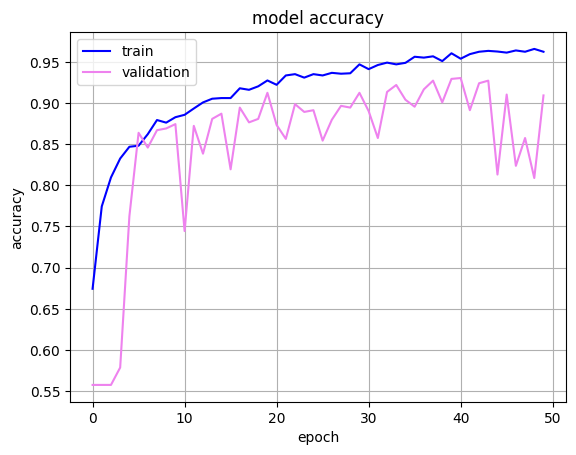

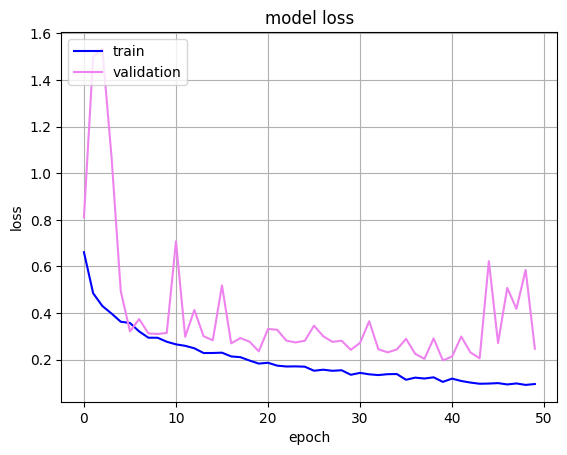

In [ ]:
# Final best model -3 convolutional

with tf.device(device_name):
  layer_sizes=[128,64,32]
  pool=4
  kern=3

  reset_random_seeds()

  final_model = Sequential()

  final_model.add(Conv2D(layer_sizes[0], (kern,kern), input_shape=input_shape, activation='relu', padding='same'))
  final_model.add(BatchNormalization())
  final_model.add(MaxPooling2D(pool_size=(pool,pool), padding='same'))

  final_model.add(Conv2D(layer_sizes[1], (kern,kern), activation='relu',padding='same'))
  final_model.add(BatchNormalization())
  final_model.add(MaxPooling2D(pool_size=(pool,pool), padding='same'))

  final_model.add(Conv2D(layer_sizes[2], (kern,kern), activation='relu',padding='same'))
  final_model.add(BatchNormalization())

  final_model.add(Flatten())
  final_model.add(Dropout(0.75))

  final_model.add(Dense(128, activation='relu'))
  final_model.add(BatchNormalization())


  final_model.add(Dense(1,activation='sigmoid'))

  early_stopping = EarlyStopping(monitor='val_accuracy', patience=15, restore_best_weights=True)

  final_model.compile(loss='binary_crossentropy',optimizer=keras.optimizers.Adam(0.0001),metrics=['accuracy'])
  final_history=final_model.fit(X_conv, y, batch_size=32, epochs=50, validation_split=0.2, callbacks=[early_stopping])

  final_model.evaluate(X_test_conv,y_test, return_dict=True)
  plot_function(final_history)

In [ ]:
# Confusion matrix

val_predicts = final_model.predict(X_test_conv)
predictions = [1*(x[0]>=0.5) for x in val_predicts]
conf_matr = confusion_matrix(y_test, predictions)
print(conf_matr)

37/37 [==============================] - 1s 13ms/step
[[624  16]
 [ 90 454]]


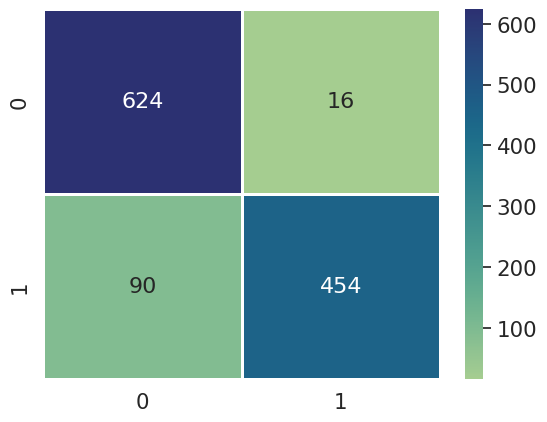

In [ ]:
# Plot confusion matrix

df_cm=pd.DataFrame(conf_matr, range(2), range(2))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, annot_kws={'size':16}, cmap="crest", linewidth=.9, linecolor='white', fmt='d')
plt.show()

In [ ]:
# Cross validation

with tf.device(device_name):
  k = 5
  kf = KFold(n_splits=k,shuffle=True,random_state=1)
  zero_one_losses = []
  accuracies = []

  for train_index,test_index in kf.split(X_conv):
      X_train, X_val = X_conv[train_index],X_conv[test_index]
      y_train, y_val = y[train_index],y[test_index]

      layer_sizes=[128,64,32]
      pool=4
      kern=3
      reset_random_seeds()
      model_cv = Sequential()
      model_cv.add(Conv2D(layer_sizes[0], (kern,kern), input_shape=input_shape, activation='relu', padding='same'))
      model_cv.add(BatchNormalization())
      model_cv.add(MaxPooling2D(pool_size=(pool,pool), padding='same'))
      model_cv.add(Conv2D(layer_sizes[1], (kern,kern), activation='relu',padding='same'))
      model_cv.add(BatchNormalization())
      model_cv.add(MaxPooling2D(pool_size=(pool,pool), padding='same'))
      model_cv.add(Conv2D(layer_sizes[2], (kern,kern), activation='relu',padding='same'))
      model_cv.add(BatchNormalization())
      model_cv.add(Flatten())
      model_cv.add(Dropout(0.75))
      model_cv.add(Dense(128, activation='relu'))
      model_cv.add(BatchNormalization())
      model_cv.add(Dense(1,activation='sigmoid'))
      early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
      model_cv.compile(loss='binary_crossentropy',optimizer=keras.optimizers.Adam(0.0001),metrics=['accuracy'])

      history = model_cv.fit(X_train, y_train, batch_size=32, epochs=50, callbacks=[early_stopping], validation_data=(X_val,y_val))
      loss,accuracy = model_cv.evaluate(X_val,y_val)
      zero_one_loss = 1-accuracy
      zero_one_losses.append(zero_one_loss)
      accuracies.append(accuracy)

  print('0-1 Losses:',zero_one_losses)
  mean_loss = np.mean(zero_one_losses)
  print("Zero-One Loss: {:.4f}".format(mean_loss))
  print('Accuracies:',accuracies)
  mean_acc = np.mean(accuracies)
  print("Accuracy: {:.4f}".format(mean_acc))


Epoch 1/50
119/119 [==============================] - 11s 60ms/step - loss: 0.6569 - accuracy: 0.6696 - val_loss: 0.7835 - val_accuracy: 0.5523
Epoch 2/50
119/119 [==============================] - 6s 53ms/step - loss: 0.5006 - accuracy: 0.7721 - val_loss: 1.4720 - val_accuracy: 0.5523
Epoch 3/50
119/119 [==============================] - 7s 58ms/step - loss: 0.4189 - accuracy: 0.8151 - val_loss: 1.5751 - val_accuracy: 0.5523
Epoch 4/50
119/119 [==============================] - 7s 56ms/step - loss: 0.3987 - accuracy: 0.8281 - val_loss: 1.0019 - val_accuracy: 0.5850
Epoch 5/50
119/119 [==============================] - 7s 57ms/step - loss: 0.3684 - accuracy: 0.8344 - val_loss: 0.5902 - val_accuracy: 0.7307
Epoch 6/50
119/119 [==============================] - 6s 54ms/step - loss: 0.3405 - accuracy: 0.8592 - val_loss: 0.4261 - val_accuracy: 0.8152
Epoch 7/50
119/119 [==============================] - 7s 57ms/step - loss: 0.3334 - accuracy: 0.8611 - val_loss: 0.3331 - val_accuracy: 0.860